## World Universities Ranking

Pamela Acosta A01637467

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model

Se comienza por descargar la librería que se quiere utilizar

In [26]:
pip install statsmodels

     |████████████████████████████████| 9.9 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 69.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
%ls

 07_02_pie_box_scatter_bubble.ipynb  'Encuesta Clase 7.ipynb'
 adult.csv                            headbrain.csv
 airline_data.csv                    'Institution (1).ipynb'
 Amazon.csv                           Institution.ipynb
 AMAZON.ipynb                         integrantes_ensanut2020_w.csv
 antropometria-dataset-2.csv          mic.xlsx
'archive (2).zip'                     nhanes_2015_2016.csv
 Canada.xlsx                         'pivot tables.ipynb'
 clase3.ipynb                         README.md
'clase 4.2.ipynb'                     requierementsEXL
 clase4.ipynb                         requirements.txt
'clase 5.ipynb'                       runtime.txt
'Clase 8 correlación.ipynb'           tokyo_2021.csv
'Clase 8 sem 4.ipynb'                 TOKYO2021.ipynb
 clase-9.ipynb                        Untitled1.ipynb
'Clase 9 Regresión lineal.ipynb'      Untitled.ipynb
 coches-variables.xlsx               'welcome_binder (1).ipynb'
 covid19Vaccination.xlsx              welcome_bind

Descargar los datos que se van a evaluar

In [4]:
path = 'cwurData.csv'
df = pd.read_csv(path)
df.head(20)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


In [5]:
df.tail()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367,567,218,861,991,812,981.0,547,44.02,2015


## 1. ¿Cuál es la variable de interés?

Nuestra variable de interés es alumni employment ya que describe el rango de empleabilidad de cada universidad, para determinar esta variable usa diferentes datos como la institución, national rank, entre otros

## 2. ¿Cuál es la información que se tiene?


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB




Se deben analizar las variables que se obtienen, en donde hay 14 variables y 2200 observaciones. La mayoría de las variables son de tipo int(5), también hay float(2) y de object (2).

Es importante conocer el tipo de variables que se tienen para poder realizar el tipo de regresión y poder analizar las gráficas esperadas.

## 3. ¿Cómo es la distribución de la variable de interés?

In [7]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


Analizar la media, estándar y cuartiles de las variables de interés que se van a utilizar para la base de datos, se sabe que los datos de la variable de interés va a ir de 0 a 1 lo que representa el ranking de empleabilidad.

## 4. Analizar la distribución que sigue la variable de interés

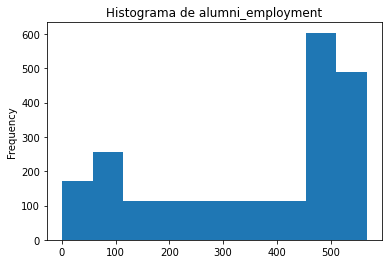

In [8]:
df['alumni_employment'].plot(kind='hist')
plt.title('Histograma de alumni_employment')
plt.show()

Se realizó el histograma de la variable de empleabilidad, en donde se puede observar una dispersión de datos a la derecha y en medio de la gráfica los datos son planos. 
Esta variable es categórica y representa el ranking de empleabilidad en el que se encuentran las universidades, lo que permite identificar la mejor universidad, así como diferentes tipos de categorías.



## 5. Analizar si existen datos atípicos dentro de nuestra variable de interés

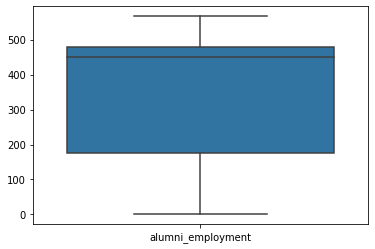

In [9]:
sns.boxplot(data = df.loc[:,['alumni_employment']])

Se realizó el boxplot de la variable de interés, en donde se puede observar que la mediana corta la caja en partes desiguales, y está situada en la parte superior, por lo que se tiene una asimetría en los datos. Así como determinar que no existen datos atípicos en esta variable.

## 6. ¿Cuál es la variable con una correlación mayor con Alumni employment?

In [22]:
vars = ['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty']
df = df[vars].dropna()
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty
0,1,Harvard University,USA,1,7,9,1
1,2,Massachusetts Institute of Technology,USA,2,9,17,3
2,3,Stanford University,USA,3,17,11,5
3,4,University of Cambridge,United Kingdom,1,10,24,4
4,5,California Institute of Technology,USA,4,2,29,7
...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218
2196,997,Alexandria University,Egypt,4,236,566,218
2197,998,Federal University of Ceará,Brazil,18,367,549,218
2198,999,University of A Coruña,Spain,40,367,567,218


In [15]:
df[vars].corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833
quality_of_education,0.676166,0.211975,1.000000,0.606421,0.786181
alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618
quality_of_faculty,0.663864,0.222833,0.786181,0.558618,1.000000


Al realizar las correlaciones entre las vaiable se puede saber que existe una mayor correlación entre la variable de interés alumni_employment con world_rank, esto quire decir que su coeficiente de correlación es de 0.668529

Por lo que se podría crear la siguiente función


alumni_employment = B0 + B1 * world_rank

##  7. ¿Qué tan bueno es el modelo usando Regresión lineal con las variables alumni_employment ~ world_rank?

In [28]:
model = sm.OLS.from_formula ('alumni_employment ~ world_rank',
                            data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      alumni_employment   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     1776.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):          5.25e-285
Time:                        00:11:17   Log-Likelihood:                -13976.
No. Observations:                2200   AIC:                         2.796e+04
Df Residuals:                    2198   BIC:                         2.797e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.5396      5.366     31.408      0.000     158.016     179.063
world_rank     0.4103      0.010     42.145      0.000       0.391       0.429
==============================================================================
Omnibus:                      109.754   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.949
Skew:                           0.350   Prob(JB):                     1.95e-17
Kurtosis:                       2.408   Cond. No.                         998.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pip install plotly

     |████████████████████████████████| 23.9 MB 4.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [33]:
import plotly.express as px
import plotly.graph_objects as go

In [36]:
data = df.sample (n = 500,
                  random_state = 42)
data.shape

(500, 7)

In [37]:
data = df.head(500)

In [38]:
bar_data = data.groupby (['alumni_employment'])['world_rank'].sum().reset_index()
bar_data.head()

,alumni_employment,world_rank
0,1,2
1,2,4
2,3,88
3,4,200
4,5,46


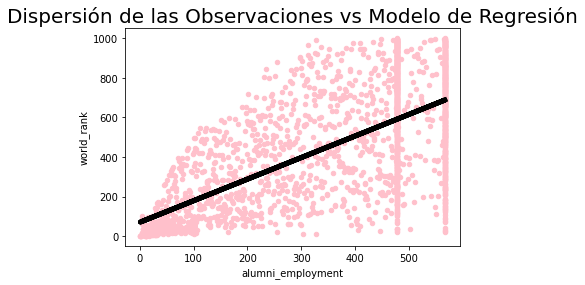

In [55]:
lm = linear_model.LinearRegression() 
X = pd.DataFrame(df['alumni_employment']) 
Y = pd.DataFrame(df['world_rank'])

model_lm = lm.fit(X,Y) 
model_lm 

df.plot(kind='scatter',
        x = 'alumni_employment',
        y = 'world_rank', color = 'pink')

plt.plot(X,
         model_lm.predict(X),
         linewidth = 5,
         color = 'black')
plt.title('Dispersión de las Observaciones vs Modelo de Regresión', fontsize = 20) 
plt.show()

In [51]:
def category(rank): 
    if (rank>=0)&(rank<=0.25):
        return 'regular class' 
    elif (rank>0.25)&(rank<=0.5):
        return 'third class' 
    elif (rank>0.5)&(rank<=0.75):
        return 'second class'
    else:
        return 'first class'

In [53]:
df['Rank'] = df['alumni_employment'].apply(lambda x:category(x))

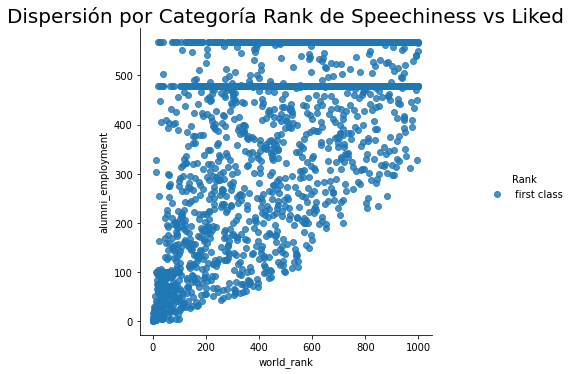

In [54]:
sns.lmplot(x = 'world_rank', y = 'alumni_employment', data = df, fit_reg = False, hue = 'Rank')
plt.title('Dispersión por Categoría Rank de Speechiness vs Liked', fontsize = 20) 
plt.show()